In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
base = "../data/"
total = "data"
ext = ".csv"
header = ("cfq", "deadline", "noop")

f = base + total + ext
df = pd.read_csv(f, header=None)

df

def collect_read_times(file_name):
    """Read thread times from a file."""
    f = open(file_name)
    times = []
    # Regular expression to find floats
    time = re.compile("(\d+\.\d+)")

    for line in f:
        match = time.match(line)

        if (match):
            t = float(match.group(1))
            times.append(t)

    return times

def get_read_times():
    """Collect timing information about all schedulers and store in csv files"""
    schedulers = ["cfq", "deadline", "noop"]
    base = "../data/"
    ext = ".log"
    header=("cfq", "deadline", "noop")

    # Collect all times in one file
    times = {key: [] for key in schedulers}
    for s in schedulers:
        f = base+s+ext
        times[s] = collect_read_times(f)
    # Write to file
    df = pd.DataFrame(times)
    return df

In [3]:
df = pd.read_csv(f, header=None, index_col=0)
df = df.transpose()
df.describe()

,cfq,noop,deadline
count,10.000000,1.000000e+01,1.000000e+01
mean,0.052000,5.000000e-02,5.000000e-02
std,0.004216,7.314236e-18,7.314236e-18
min,0.050000,5.000000e-02,5.000000e-02
25%,0.050000,5.000000e-02,5.000000e-02
50%,0.050000,5.000000e-02,5.000000e-02
75%,0.050000,5.000000e-02,5.000000e-02
max,0.060000,5.000000e-02,5.000000e-02


In [4]:
# Get individual read times
read_df = get_read_times()

read_df.describe()

,cfq,deadline,noop
count,4.272000e+04,4.272000e+04,4.272000e+04
mean,3.219272e-06,3.166068e-06,3.104595e-06
std,8.937756e-06,7.733106e-06,5.705920e-06
min,2.000000e-08,2.000000e-08,2.000000e-08
25%,4.200000e-08,4.100000e-08,4.100000e-08
50%,7.300000e-08,6.300000e-08,6.100000e-08
75%,5.852500e-07,5.130000e-07,4.960000e-07
max,1.431250e-03,8.991410e-04,2.042760e-04


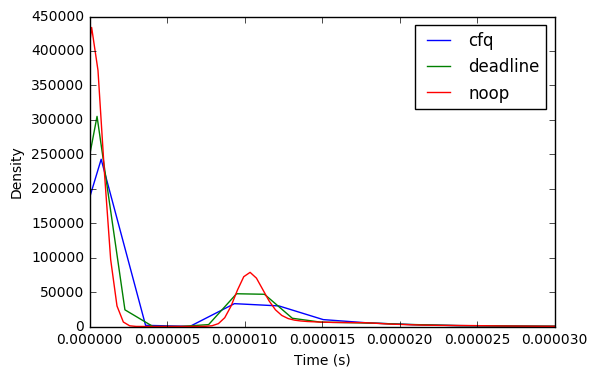

In [5]:
ax = read_df.plot.kde()
ax.set_xlabel("Time (s)")
ax.set_xlim([0, 0.00003])
fig = ax.get_figure()
fig

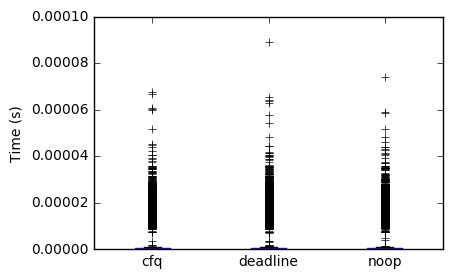

In [6]:
ax = read_df.plot.box(figsize=(4.5,3))
ax.set_ylabel("Time (s)")
ax.set_ylim([0, 0.0001])
fig = ax.get_figure()
fig